In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import dataframe_image as df_image 
import numpy as np
import sqlalchemy
import seaborn as sns

**Criando a conexão com o banco de dados**

In [2]:
str_contetion = 'sqlite:///cardio.db'
conection  = sqlalchemy.create_engine( str_contetion , echo=True)

**Seprando as querys com pandas**

In [3]:
sql_query = pd.read_sql_query(
    """
        SELECT *
        
        FROM tb_cardio
    """,
    conection
    
)

2022-12-04 18:45:17,505 INFO sqlalchemy.engine.Engine 
        SELECT *
        
        FROM tb_cardio
    
2022-12-04 18:45:17,505 INFO sqlalchemy.engine.Engine [raw sql] ()


**Data Frame**

Mudando os indices da tabela de dados para a melhora da informação


In [4]:
df = pd.DataFrame( sql_query )
df.head()

,index,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,TM195,18,Male,14,Single,3,4,29562,112
1,1,TM195,19,Male,15,Single,2,3,31836,75
2,2,TM195,19,Female,14,Partnered,4,3,30699,66
3,3,TM195,19,Male,12,Single,3,3,32973,85
4,4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
new_data = df.rename( columns={'index': 'indice',
                               'Product': 'Produto',
                               'Age': 'Idade',
                               'Gender': 'Genero',
                               'Education': 'Educacao',
                               'MaritalStatus': 'Estado-civil',
                               'Usage': 'Uso',
                               'Fitness': 'Ginastica',
                               'Income': 'Renda',
                               'Miles': 'Milhas'}, inplace=True)

In [6]:
# gerando a imagem para o relatorio
df_image.export(df.describe().T,  'descrição.png')

**Raspagem de dados únicos dentro do dataframe**<br>
unique para vê os dados únicos <br>
nunique para a contagem desses dados <br>

In [16]:
def nunique(i):
    print('{}'.format(i)) # formatnado o sistema em string
    print(df[i].unique()) # unicos do data frame 
    print(df[i].nunique()) 


for i in df.select_dtypes( include='object' ):
    nunique(i)

Produto
['TM195' 'TM498' 'TM798']
3
Genero
['Male' 'Female']
2
Estado-civil
['Single' 'Partnered']
2


**Coloração do dataframe**

<AxesSubplot: >

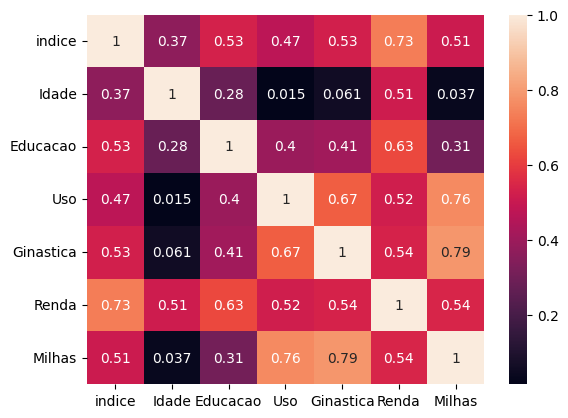

In [17]:
sns.heatmap( df.select_dtypes( include='number' ).corr() , annot=True )

**Fazendo a comparação com histograma**

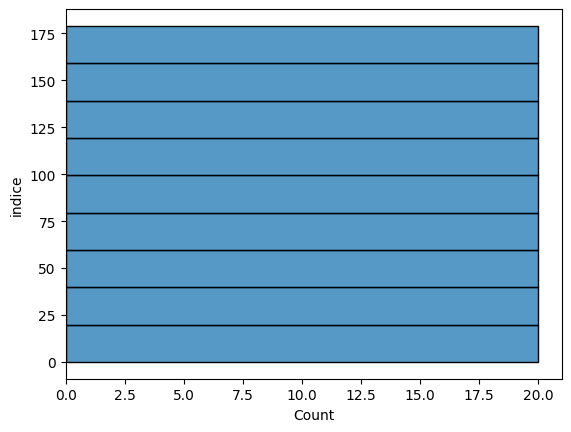

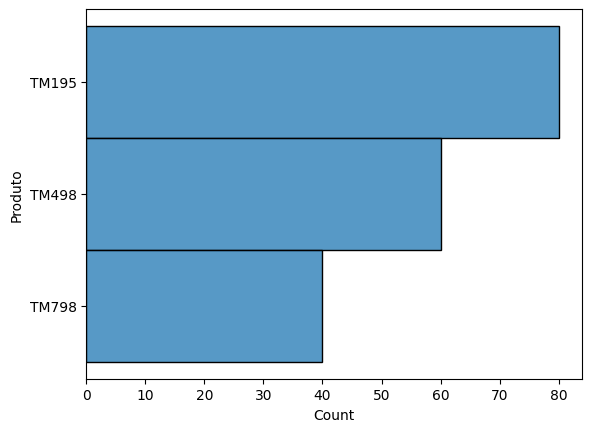

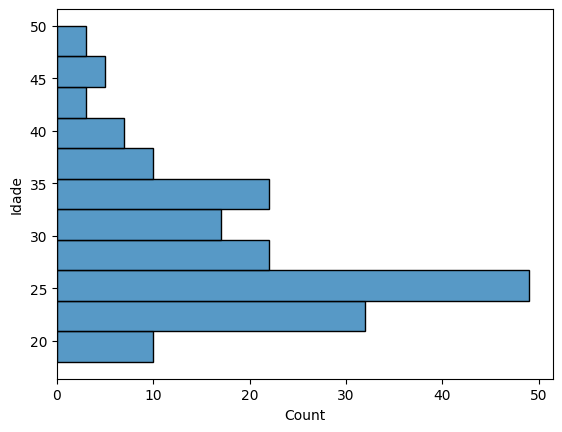

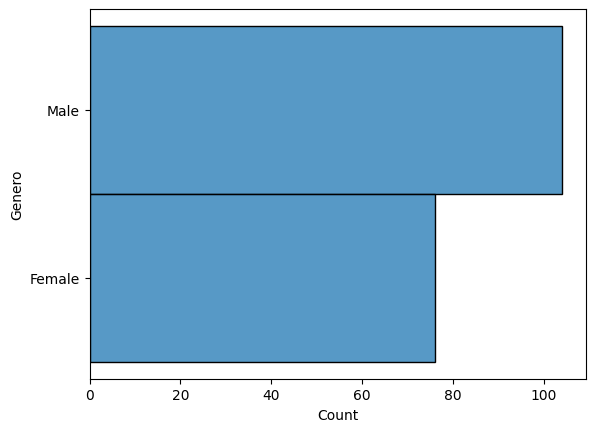

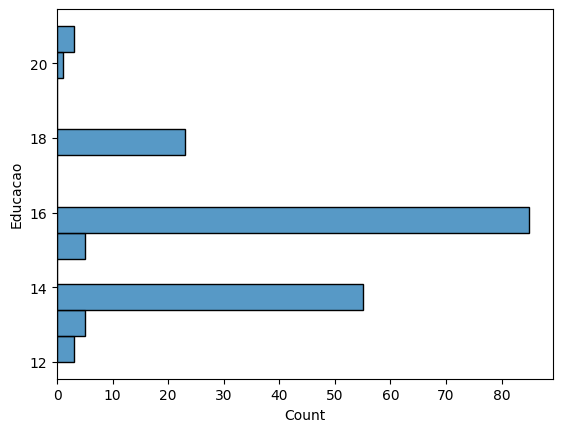

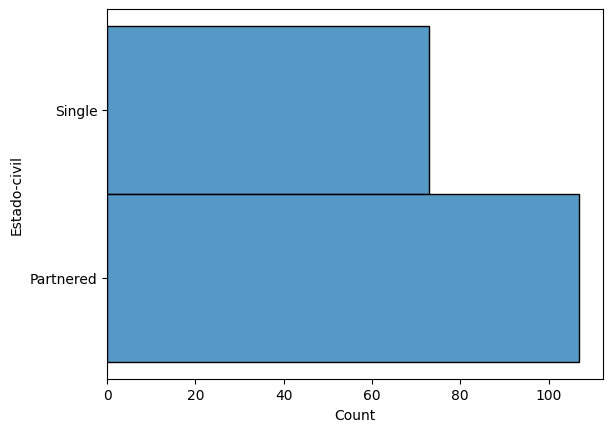

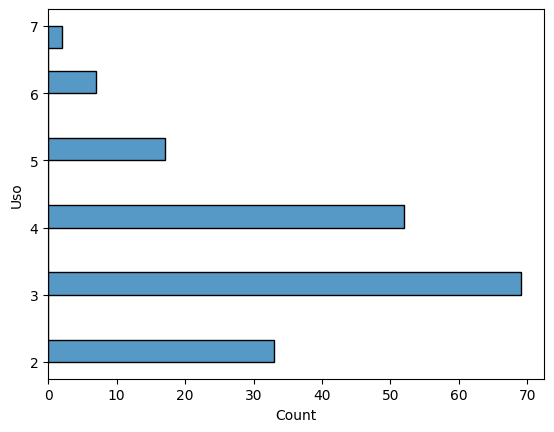

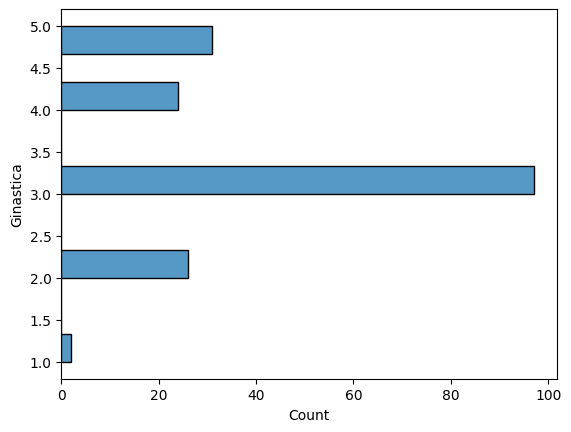

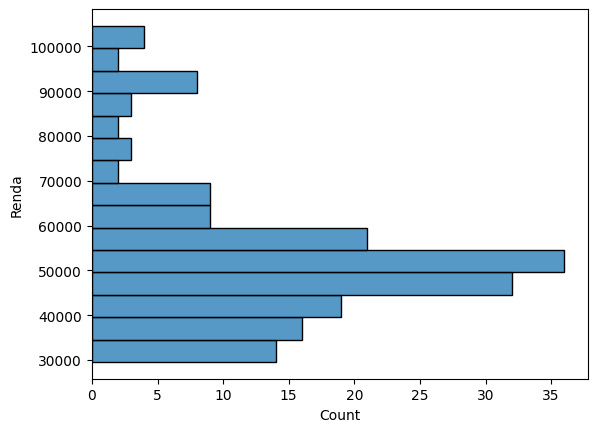

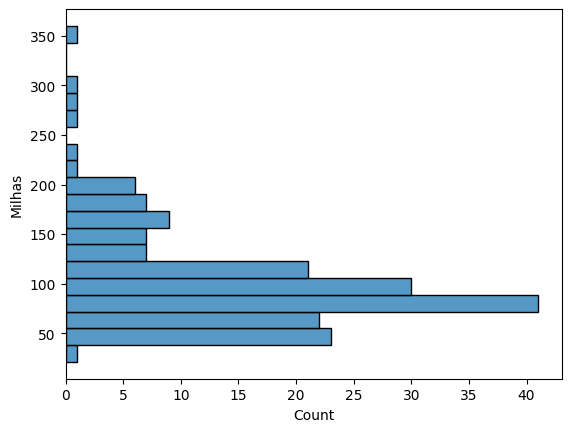

In [18]:
def comparacao(j):
    sns.histplot( y = df[j] )
    plt.show()
    
    
for j in df.columns:
    comparacao(j)

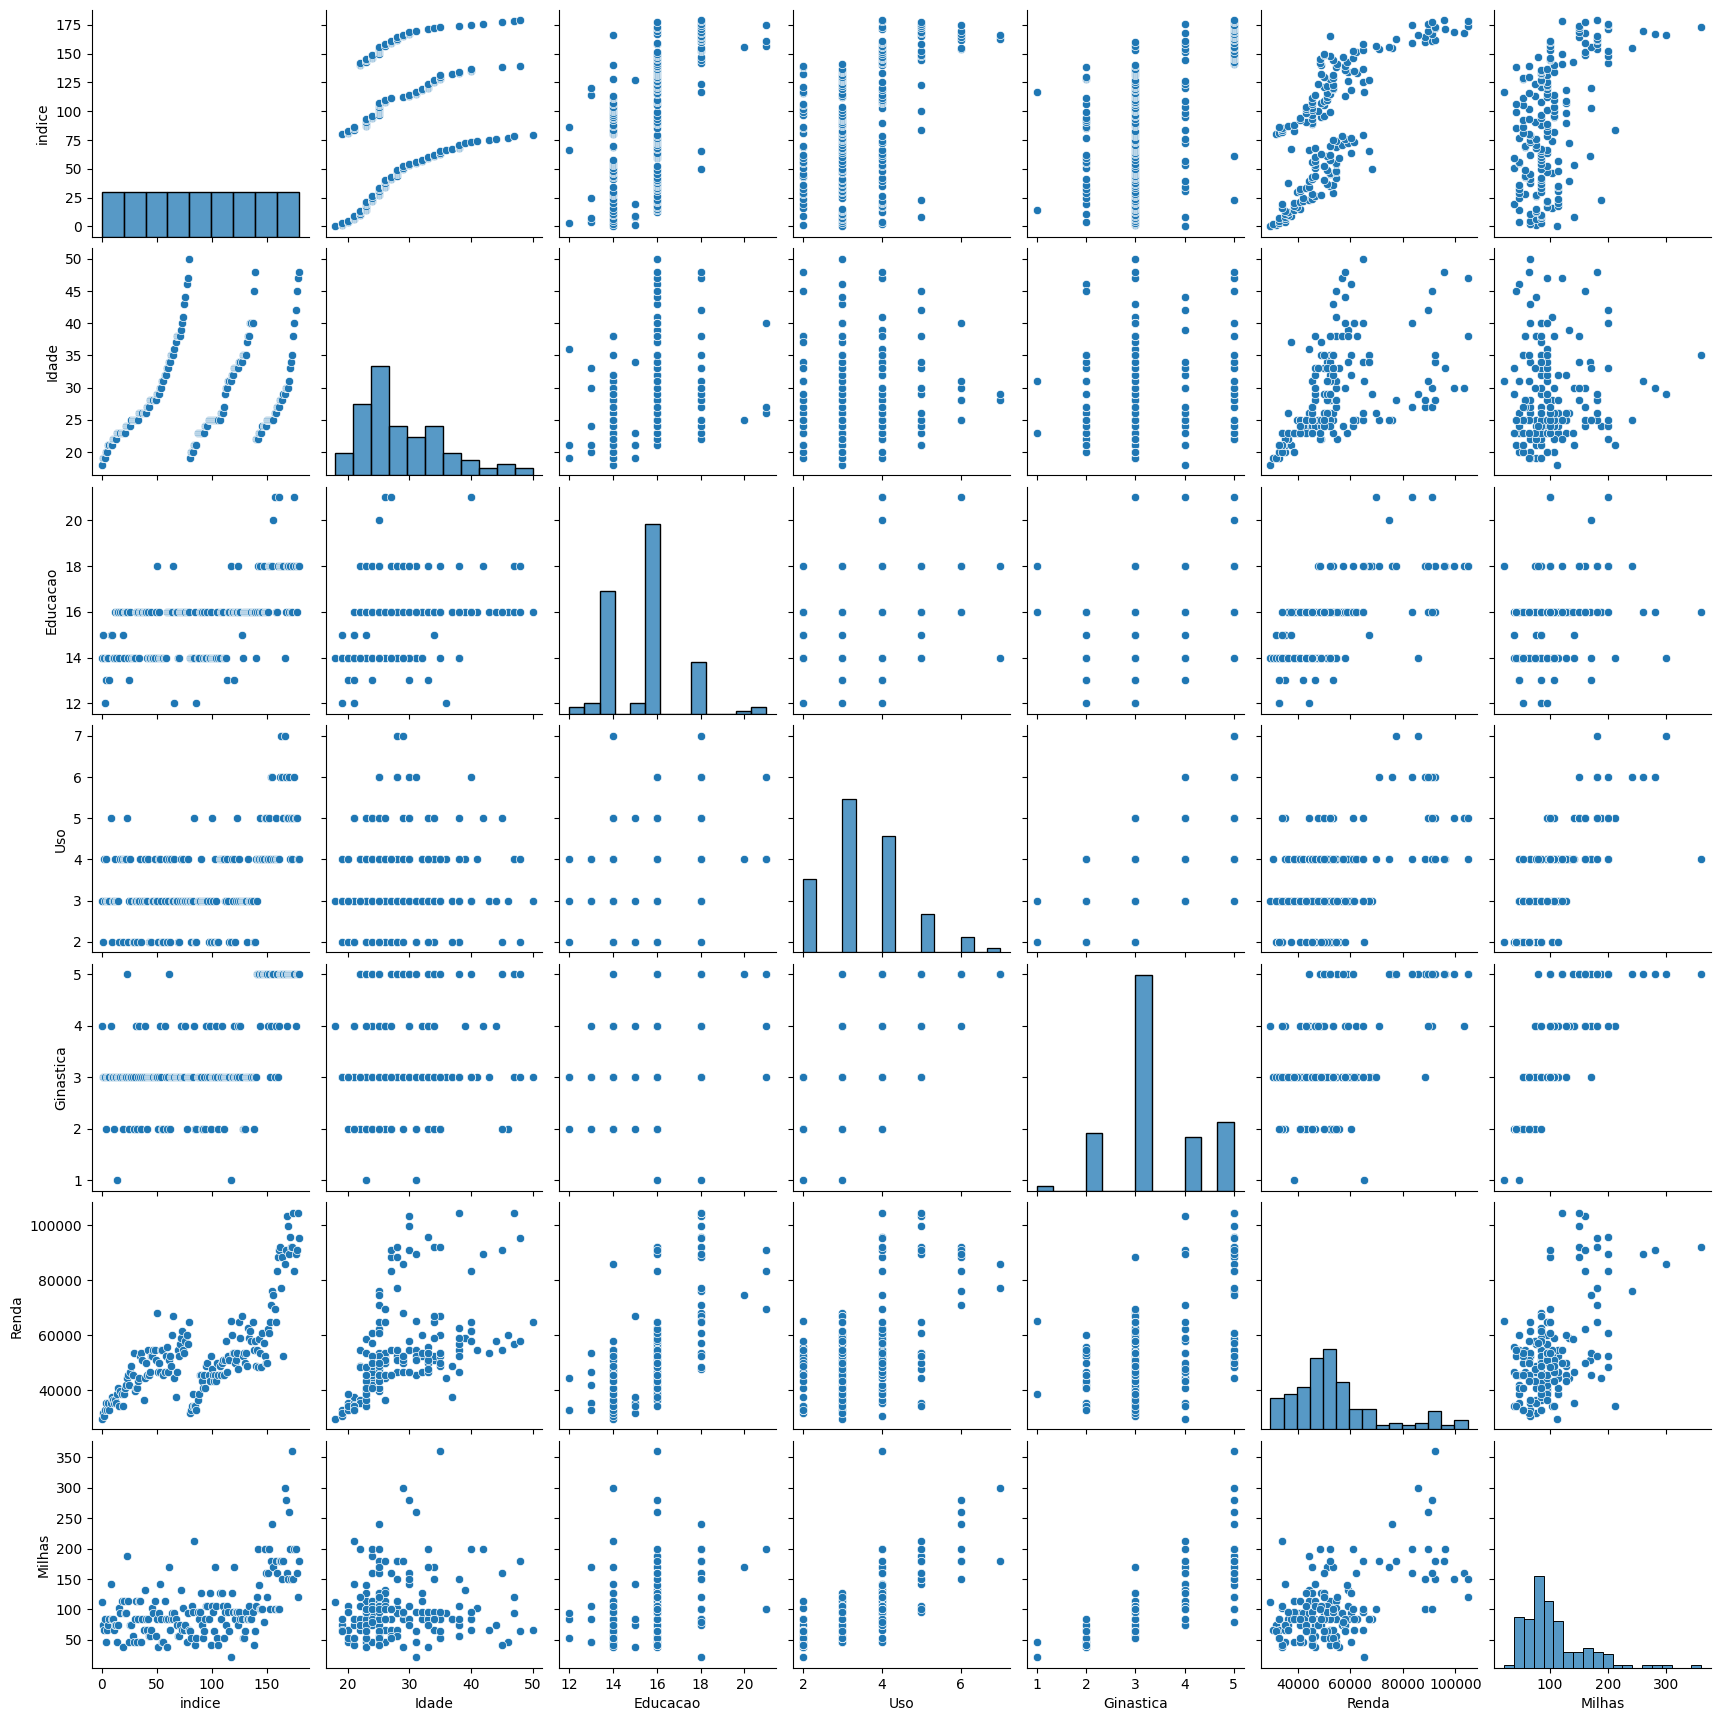

In [10]:
sns.pairplot( df )

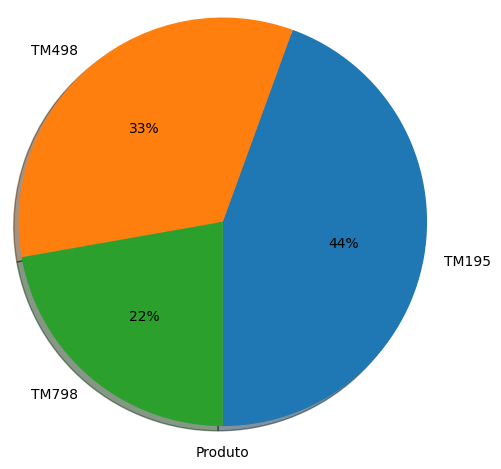

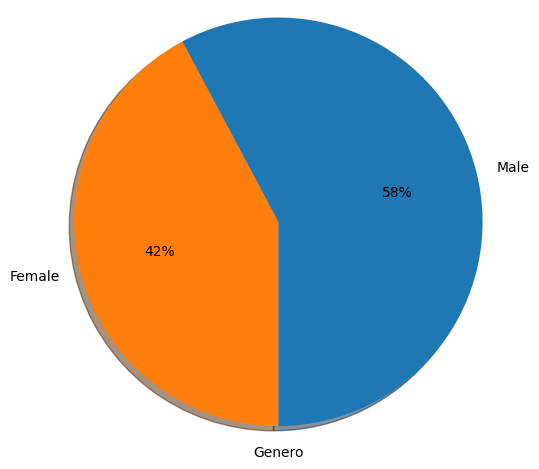

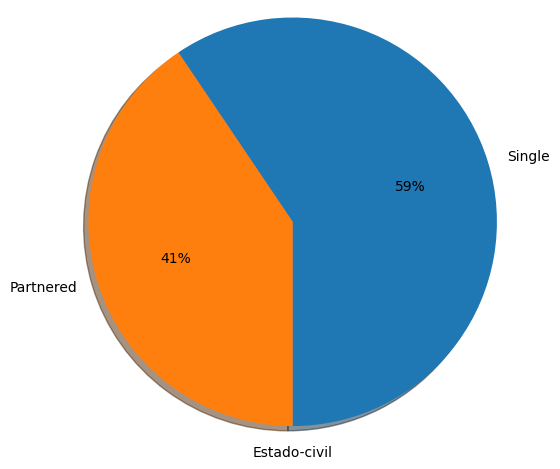

In [22]:
def pie(j):
    labels = list(df[j].unique())
    sizes = list(df[j].value_counts())
    
    plt.pie(sizes,
            labels = labels,
            autopct = "%1.0f%%",
            startangle = 270,
            shadow = True,
            radius =1.2,
            textprops = {"fontsize": 10}
           )
           
    plt.xlabel("{}".format(j))
            
    plt.tight_layout()
    plt.show()
            
for j in df.select_dtypes(include = "object"):
    pie(j)